In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from joblib import load
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random
df = load("../../preprocessing/clustering_data.joblib")
df.head()

,pca_0,pca_1
0,0.751095,0.480033
1,0.666295,0.486975
2,0.693642,0.494915
3,0.465188,0.431669
4,0.645849,0.529784


In [7]:
df.shape

(1500, 2)

In [8]:
df.describe()

,pca_0,pca_1
count,1500.000000,1500.000000
mean,0.430761,0.457253
std,0.196214,0.165613
min,0.000000,0.000000
25%,0.286463,0.336472
50%,0.419752,0.457692
75%,0.555506,0.568831
max,1.000000,1.000000


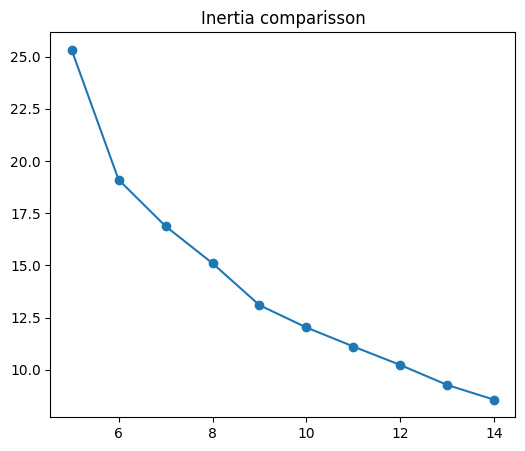

In [9]:
inits = ['k-means++', 'random']
clusters = range(5,15)
inertias = []
silhouettes = []
for cluster in clusters:
  for init in inits:
    kmeans = KMeans(n_clusters=cluster, init=init, n_init='auto')
    kmeans.fit(df)

    if init == 'k-means++':
      inertias.append(kmeans.inertia_)
      silhouettes.append(silhouette_score(df, kmeans.labels_))

plt.figure(figsize=(6,5))
plt.plot(clusters, inertias, marker='o')
plt.title('Inertia comparisson')
plt.show()

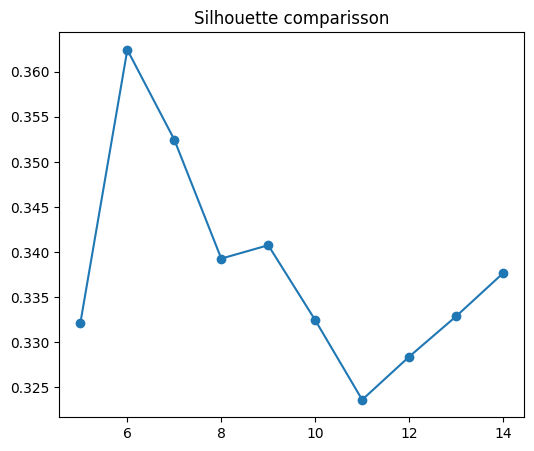

In [10]:
plt.figure(figsize=(6,5))
plt.plot(clusters, silhouettes, marker='o')
plt.title('Silhouette comparisson')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=50, init='k-means++', n_init='auto')
kmeans.fit(df)

KMeans(n_clusters=50, n_init='auto')

In [13]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids

,0,1
0,0.303361,0.400427
1,0.480204,0.622791
2,0.638944,0.348133
3,0.178125,0.670688
4,0.814266,0.551621
5,0.291867,0.301212
6,0.259035,0.579783
7,0.462056,0.408990
8,0.216554,0.403552
9,0.231163,0.230324


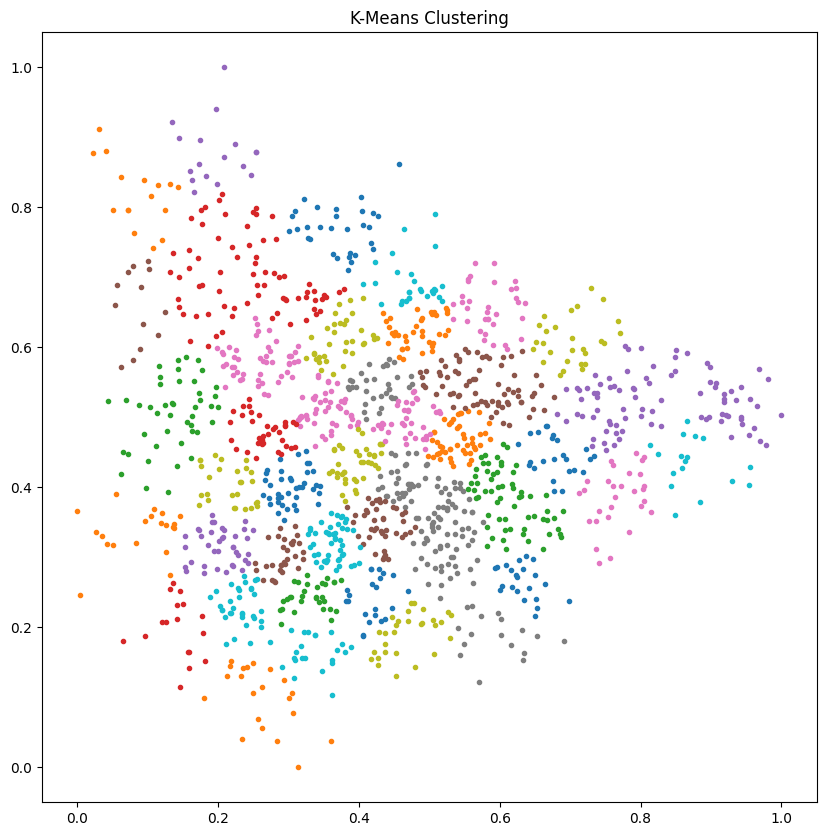

In [14]:
plt.figure(figsize=(10,10))
for cluster_label in range(50):
  cluster = df[kmeans.labels_ == cluster_label]
  plt.scatter(cluster['pca_0'], cluster['pca_1'], marker='.')

plt.title("K-Means Clustering")
plt.show()